In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

603 circles detected


Text(0.5, 1.0, 'Output of hough transform')

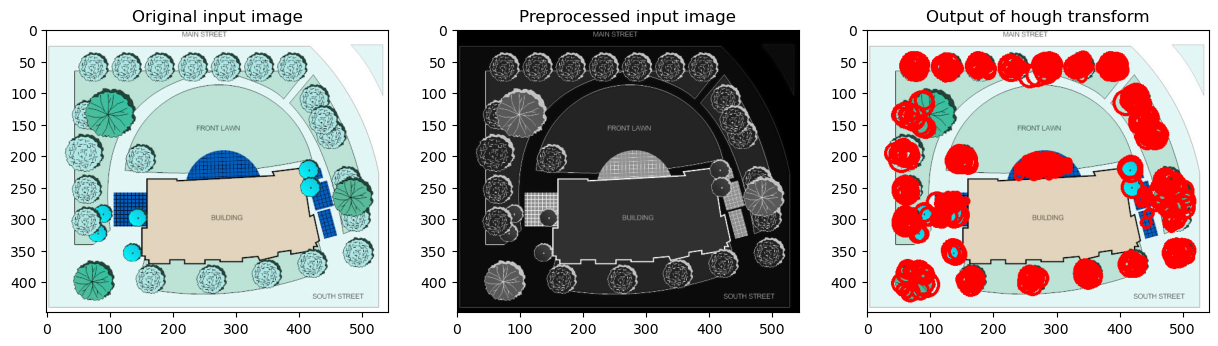

In [52]:
# Load the landscape plan and convert it to grayscale
orig_img = cv2.imread('../data/landscape_plans/landscape3.jpg')
img = orig_img.copy()
output = img.copy()

# Convert to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = ~img
# Smoothing
img = cv2.bilateralFilter(img, 15, 20, 40)
# img = cv2.GaussianBlur(img, (5,5), 0)
# Hough Transform
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 3, param1=50, param2=20, minRadius=3, maxRadius=20)
circles = np.uint16(np.around(circles))

print(f'{circles.shape[1]} circles detected')

for (x, y, r) in circles[0,:]:
    cv2.circle(output, (x,y), r, (255,0,0), 3)

fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(orig_img)
ax[0].set_title('Original input image')

ax[1].imshow(img, cmap='gray')
ax[1].set_title('Preprocessed input image')

ax[2].imshow(output)
ax[2].set_title('Output of hough transform')